<a href="https://colab.research.google.com/github/Ibsen-Gomes/Deep_learning_Colab/blob/main/Deep_learning_PyTorch_crossV_dropout_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2

## Application of some methods for model accuracy (Cross Validation, Dropout and Tuning)

### Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
!pip install skorch

### PyTorch package import:

In [3]:
from skorch import NeuralNetBinaryClassifier
import torch
from sklearn.model_selection import cross_val_score
torch.__version__

'2.0.1+cu118'

In [4]:
import torch.nn as nn

### Load data

In [5]:
np.random.seed(42)
torch.manual_seed(42)

In [6]:
previsores = pd.read_csv('/content/drive/MyDrive/Deep_learning/entradas_breast.csv')
classe = pd.read_csv('/content/drive/MyDrive/Deep_learning/saidas_breast.csv')


In [7]:
previsores.shape

(569, 30)

In [8]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [9]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [10]:
np.unique(classe)

array([0, 1])

### Sample count for each label:

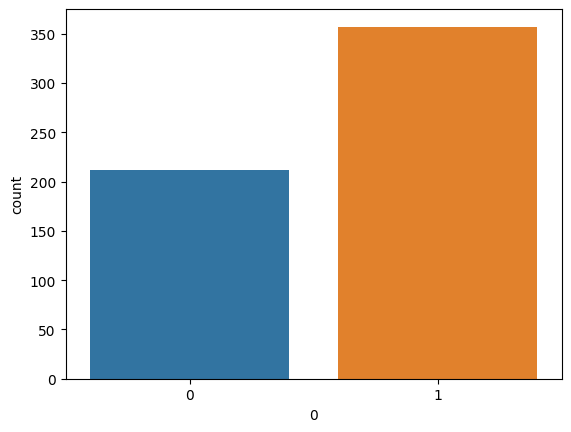

In [11]:
sns.countplot(x=classe['0']);

### Cross Validation

In [12]:
classe.shape

(569, 1)

In [13]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)

In [14]:
# retirada do 1 no shape original para utilização do PyTorch
classe.shape

(569,)

In [15]:
#type(classe)
type(previsores)

numpy.ndarray

### Classe para estrutura da rede neural:

In [16]:
# O skorch exige que a rn seja passada como uma classe que herda do nn.Module:

class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # Contruindo a rede: 30 -> 16 -> 16 -> 1

    # 1) 30 -> 16:
    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()

    # 2) 16 -> 16:
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()

    # 3) 16 -> 1:
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)


  def forward(self, X):

    X = self.dense0(X)
    X = self.activation0(X)

    X = self.dense1(X)
    X = self.activation1(X)

    X = self.dense2(X)

    return X

### Utilizando o Skorch:

In [17]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCEWithLogitsLoss,
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False) #False para que o split seja feita a validação cruzada

## Cross Validation:

In [18]:
resultados = cross_val_score(classificador_sklearn,
                             previsores,
                             classe,
                             cv=10,
                             scoring='accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1    91294.3561  0.0829
      2    72722.7842  0.0837
      3    57326.1895  0.1079
      4    45113.9061  0.0840
      5    35504.2660  0.0811
      6    27942.9745  0.0742
      7    21966.1433  0.0784
      8    17219.1712  0.0851
      9    13405.5771  0.1303
     10    10299.5128  0.1182
     11     7712.1263  0.1085
     12     5558.0446  0.1130
     13     3777.9468  0.1202
     14     2149.4901  0.0764
     15      642.8538  0.0768
     16      118.2383  0.0771
     17      107.0518  0.0857
     18       96.8006  0.0884
     19       87.7538  0.0800
     20       77.5083  0.0737
     21       69.4041  0.0769
     22       64.9020  0.0711
     23       58.1061  0.0820
     24       51.6602  0.0873
     25       47.0568  0.0819
     26       38.7777  0.0857
     27       36.0821  0.0795
     28       32.8395  0.0736
     29       29.8898  0.0848
     30       28.6489  0.1137
     31       27.5908  0.1120
     32   

In [19]:
resultados.shape

(10,)

In [20]:
# Acurácia de cada uma das 10 partições da validação cruzada:
resultados

array([0.80701754, 0.78947368, 0.84210526, 0.9122807 , 0.8245614 ,
       0.94736842, 0.84210526, 0.87719298, 0.50877193, 0.875     ])

In [21]:
media = resultados.mean()
desvio = resultados.std()
media, desvio

(0.8225877192982456, 0.11398636779767021)

## Dropout

##### Evita Overffiting

In [22]:
# O skorch exige que a rn seja passada como uma classe que herda do nn.Module:

class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # Contruindo a rede: 30 -> 16 -> 16 -> 1

    # 1) 30 -> 16:
    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dropout0 = nn.Dropout(0.1)

    # 2) 16 -> 16:
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.1)

    # 3) 16 -> 1:
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)

  def forward(self, X):

    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dropout0(X)

    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dropout1(X)

    X = self.dense2(X)

    return X

In [23]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCEWithLogitsLoss,
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False) #False para que o split seja feita a validação cruzada

In [24]:
resultados = cross_val_score(classificador_sklearn,
                             previsores,
                             classe,
                             cv=10,
                             scoring='accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1    57943.8272  0.1251
      2    43859.3401  0.1166
      3    32973.4188  0.1134
      4    24364.3071  0.1119
      5    15986.6216  0.1076
      6     9430.6979  0.1083
      7     4656.2699  0.1148
      8     2337.8724  0.1225
      9     1854.1743  0.1103
     10     2052.1476  0.1103
     11     1690.5865  0.1257
     12     1941.5747  0.1258
     13     1604.1749  0.0935
     14     1325.2572  0.0832
     15     1428.2920  0.0818
     16     1502.2755  0.0790
     17     1359.1993  0.0828
     18     1248.2649  0.0891
     19     1058.5946  0.0879
     20     1158.8267  0.0837
     21      986.9523  0.0984
     22      989.5108  0.0781
     23      846.9910  0.0924
     24      893.0103  0.0951
     25      850.0489  0.0767
     26      904.9261  0.0842
     27      878.2334  0.0830
     28      761.7968  0.0822
     29      731.2734  0.0812
     30      629.3133  0.0866
     31      653.8505  0.0863
     32   

In [25]:
media = resultados.mean()
desvio = resultados.std()
media, desvio

(0.7487468671679197, 0.09202680237817967)

In [26]:
resultados

array([0.80701754, 0.61403509, 0.80701754, 0.71929825, 0.8245614 ,
       0.61403509, 0.87719298, 0.63157895, 0.80701754, 0.78571429])

## Tuning:

In [27]:
import torch.nn.functional as F
from sklearn.model_selection import GridSearchCV

In [28]:
# O skorch exige que a rn seja passada como uma classe que herda do nn.Module:

class classificador_torch(nn.Module):
  def __init__(self, activation, neurons, initializer):
    super().__init__() #chamar o construtor da superclasse nn.Module

    # Contruindo a rede: 30 -> 16 -> 16 -> 1

    # 1) 30 -> 16:
    self.dense0 = nn.Linear(30, neurons)
    initializer(self.dense0.weight)
    self.activation0 = activation

    # 2) 16 -> 16:
    self.dense1 = nn.Linear(neurons, neurons)
    initializer(self.dense1.weight)
    self.activation1 = activation


    # 3) 16 -> 1:
    self.dense2 = nn.Linear(neurons, 1)
    initializer(self.dense2.weight)

  def forward(self, X):

    X = self.dense0(X)
    X = self.activation0(X)

    X = self.dense1(X)
    X = self.activation1(X)

    X = self.dense2(X)

    return X

In [29]:
class classificador_torch(nn.Module):
  def __init__(self, activation, neurons, initializer):
    super().__init__()
    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30, neurons)
    initializer(self.dense0.weight)
    self.activation0 = activation
    self.dense1 = nn.Linear(neurons, neurons)
    initializer(self.dense1.weight)
    self.activation1 = activation
    self.dense2 = nn.Linear(neurons, 1)
    initializer(self.dense2.weight)
    # self.output = nn.Sigmoid() ** ATUALIZAÇÃO (ver detalhes no texto acima) **

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dense2(X)
    # X = self.output(X) ** ATUALIZAÇÃO (ver detalhes no texto acima) **
    return X

#### Skorch

In [30]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  lr = 0.001,
                                                  optimizer__weight_decay = 0.0001,
                                                  train_split=False)

### Tuning of parameters:

In [31]:
# Hyperparams:

params = {'batch_size': [10],
          'max_epochs': [100],
          'optimizer': [torch.optim.Adam, torch.optim.SGD],
          'criterion': [torch.nn.BCEWithLogitsLoss], #, torch.nn.HingeEmbeddingLoss], # ** ATUALIZAÇÃO **
          'module__activation': [F.relu, F.tanh],
          'module__neurons': [8, 16],
          'module__initializer': [torch.nn.init.uniform]} # _, torch.nn.init.normal_]}

In [32]:
params

{'batch_size': [10],
 'max_epochs': [100],
 'optimizer': [torch.optim.adam.Adam, torch.optim.sgd.SGD],
 'criterion': [torch.nn.modules.loss.BCEWithLogitsLoss],
 'module__activation': [<function torch.nn.functional.relu(input: torch.Tensor, inplace: bool = False) -> torch.Tensor>,
  <function torch.nn.functional.tanh(input)>],
 'module__neurons': [8, 16],
 'module__initializer': [<function torch.nn.init._make_deprecate.<locals>.deprecated_init(*args, **kwargs)>]}

In [33]:
grid_search = GridSearchCV(estimator=classificador_sklearn,
                           param_grid=params,
                           scoring = 'accuracy',
                           cv = 2)

grid_search = grid_search.fit(previsores, classe)

  epoch    train_loss     dur
-------  ------------  ------
      1    36342.7612  0.0422
      2    32728.1873  0.0441
      3    29349.7843  0.0485
      4    26261.3702  0.0398


<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      5    23473.5019  0.0508
      6    20968.4843  0.0425
      7    18721.1161  0.0382
      8    16705.0340  0.0393
      9    14894.3633  0.0386
     10    13265.4118  0.0387
     11    11795.8477  0.0403
     12    10465.2012  0.0489
     13     9254.8730  0.0395
     14     8147.7951  0.0406
     15     7128.8449  0.0439
     16     6184.3698  0.0507
     17     5302.0033  0.0399
     18     4470.4184  0.0413
     19     3680.7393  0.0459
     20     2941.1209  0.0474
     21     2243.5451  0.0432
     22     1564.3886  0.0430
     23      890.1107  0.0435
     24      334.3039  0.0477
     25      127.6136  0.0626
     26       99.6899  0.0433
     27       84.7702  0.0445
     28       76.7327  0.0455
     29       70.9578  0.0427
     30       65.7529  0.0479
     31       63.6970  0.0400
     32       59.7167  0.0414
     33       54.2750  0.0419
     34       51.4807  0.0458
     35       49.3654  0.0398
     36       44.5924  0.0389
     37       43.8851  0.0429
     38   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      4    17628.7771  0.0630
      5    15570.0950  0.0610
      6    13699.1301  0.0653
      7    12001.1092  0.0594
      8    10459.2257  0.0583
      9     9056.4348  0.0563
     10     7776.0654  0.0555
     11     6601.9774  0.0536
     12     5518.4901  0.0532
     13     4510.2036  0.0569
     14     3561.7410  0.0602
     15     2657.4376  0.0615
     16     1780.9886  0.0606
     17      915.0003  0.0555
     18      261.4255  0.0550
     19      119.9106  0.0558
     20      134.4810  0.0584
     21      123.3945  0.0592
     22      117.6887  0.0866
     23      114.4266  0.0635
     24      109.6783  0.0622
     25      106.1552  0.0608
     26      102.5265  0.0579
     27       97.7800  0.0589
     28       95.2039  0.0624
     29       91.9666  0.0586
     30       86.4990  0.0417
     31       84.1332  0.0410
     32       82.3328  0.0429
     33       78.9655  0.0470
     34       77.9928  0.0406
     35       75.3647  0.0399
     36       74.9720  0.0397
     37   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      7        0.7088  0.0326
      8        0.7081  0.0278
      9        0.7075  0.0307
     10        0.7069  0.0283
     11        0.7062  0.0384
     12        0.7056  0.0302
     13        0.7050  0.0295
     14        0.7044  0.0324
     15        0.7038  0.0298
     16        0.7032  0.0291
     17        0.7027  0.0306
     18        0.7021  0.0314
     19        0.7015  0.0349
     20        0.7010  0.0317
     21        0.7004  0.0303
     22        0.6999  0.0294
     23        0.6994  0.0316
     24        0.6988  0.0299
     25        0.6983  0.0266
     26        0.6978  0.0309
     27        0.6973  0.0313
     28        0.6968  0.0436
     29        0.6963  0.0314
     30        0.6959  0.0287
     31        0.6954  0.0297
     32        0.6949  0.0283
     33        0.6945  0.0286
     34        0.6940  0.0304
     35        0.6936  0.0301
     36        0.6931  0.0340
     37        0.6927  0.0296
     38        0.6923  0.0296
     39        0.6918  0.0313
     40   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      7        0.6712  0.0500
      8        0.6710  0.0300
      9        0.6708  0.0345
     10        0.6707  0.0326
     11        0.6705  0.0322
     12        0.6703  0.0307
     13        0.6702  0.0304
     14        0.6700  0.0292
     15        0.6699  0.0306
     16        0.6697  0.0312
     17        0.6696  0.0321
     18        0.6694  0.0371
     19        0.6693  0.0288
     20        0.6691  0.0314
     21        0.6690  0.0421
     22        0.6689  0.0364
     23        0.6687  0.0307
     24        0.6686  0.0314
     25        0.6685  0.0327
     26        0.6683  0.0300
     27        0.6682  0.0281
     28        0.6681  0.0298
     29        0.6679  0.0369
     30        0.6678  0.0331
     31        0.6677  0.0321
     32        0.6676  0.0314
     33        0.6675  0.0308
     34        0.6674  0.0314
     35        0.6672  0.0303
     36        0.6671  0.0314
     37        0.6670  0.0319
     38        0.6669  0.0298
     39        0.6668  0.0311
     40   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      4    91370.3705  0.0569
      5    81092.4867  0.0548
      6    71932.3706  0.0582
      7    63782.5765  0.0698
      8    56502.8845  0.0646
      9    49985.3533  0.0579
     10    44119.6014  0.0576
     11    38821.1102  0.0565
     12    34017.7685  0.0585
     13    29623.5561  0.0548
     14    25575.2970  0.0566
     15    21822.9395  0.0541
     16    18323.4110  0.0541
     17    15030.0489  0.0537
     18    11897.2271  0.0543
     19     8881.3311  0.0542
     20     5937.2883  0.0612
     21     3016.7028  0.0589
     22      651.0870  0.0650
     23      107.8477  0.0595
     24      161.5265  0.0575
     25      143.6580  0.0569
     26      143.1827  0.0598
     27      135.3613  0.0664
     28      121.0376  0.0546
     29      115.0969  0.0650
     30      109.9414  0.0577
     31      113.1908  0.0606
     32      107.0503  0.0542
     33      117.0636  0.0595
     34      112.6576  0.0565
     35      124.9714  0.0553
     36      126.1072  0.0804
     37   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      5    47491.1876  0.0449
      6    41658.1417  0.0428
      7    36499.7300  0.0419
      8    31954.9859  0.0404
      9    28011.4831  0.0422
     10    24572.2844  0.0443
     11    21538.0773  0.0417
     12    18840.6796  0.0419
     13    16438.0319  0.0434
     14    14293.4571  0.0433
     15    12376.7306  0.0573
     16    10651.1021  0.0425
     17     9087.5225  0.0403
     18     7664.7596  0.0431
     19     6374.9166  0.0494
     20     5198.8958  0.0415
     21     4100.5424  0.0454
     22     3059.3238  0.0397
     23     2078.2568  0.0405
     24     1136.0404  0.0414
     25      316.4561  0.0487
     26      138.2082  0.0410
     27      135.0827  0.0448
     28      120.4774  0.0417
     29      112.4590  0.0440
     30      104.1508  0.0410
     31       98.5011  0.0462
     32       92.7321  0.0409
     33       90.1594  0.0427
     34       87.5653  0.0454
     35       86.4939  0.0441
     36       84.3603  0.0416
     37       82.0998  0.0496
     38   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      6        0.7009  0.0328
      7        0.7004  0.0339
      8        0.6998  0.0347
      9        0.6993  0.0296
     10        0.6988  0.0293
     11        0.6983  0.0297
     12        0.6978  0.0314
     13        0.6973  0.0327
     14        0.6968  0.0409
     15        0.6963  0.0311
     16        0.6958  0.0302
     17        0.6953  0.0303
     18        0.6949  0.0328
     19        0.6944  0.0304
     20        0.6940  0.0311
     21        0.6935  0.0310
     22        0.6931  0.0286
     23        0.6926  0.0314
     24        0.6922  0.0301
     25        0.6918  0.0301
     26        0.6914  0.0368
     27        0.6910  0.0342
     28        0.6906  0.0317
     29        0.6902  0.0320
     30        0.6898  0.0335
     31        0.6894  0.0299
     32        0.6890  0.0307
     33        0.6886  0.0330
     34        0.6883  0.0302
     35        0.6879  0.0383
     36        0.6875  0.0326
     37        0.6872  0.0368
     38        0.6868  0.0302
     39   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      6        0.7017  0.0332
      7        0.7011  0.0482
      8        0.7005  0.0432
      9        0.6999  0.0425
     10        0.6993  0.0466
     11        0.6987  0.0480
     12        0.6981  0.0428
     13        0.6976  0.0444
     14        0.6970  0.0417
     15        0.6964  0.0404
     16        0.6959  0.0522
     17        0.6954  0.0528
     18        0.6948  0.0578
     19        0.6943  0.0421
     20        0.6938  0.0389
     21        0.6933  0.0389
     22        0.6928  0.0438
     23        0.6923  0.0406
     24        0.6918  0.0442
     25        0.6913  0.0390
     26        0.6909  0.0385
     27        0.6904  0.0390
     28        0.6899  0.0420
     29        0.6895  0.0427
     30        0.6891  0.0423
     31        0.6886  0.0390
     32        0.6882  0.0385
     33        0.6878  0.0385
     34        0.6873  0.0396
     35        0.6869  0.0395
     36        0.6865  0.0384
     37        0.6861  0.0421
     38        0.6857  0.0534
     39   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      4        1.3626  0.0425
      5        1.2768  0.0568
      6        1.1746  0.0402
      7        1.0501  0.0385
      8        0.9147  0.0407
      9        0.8005  0.0406
     10        0.7290  0.0404
     11        0.6937  0.0444
     12        0.6786  0.0412
     13        0.6723  0.0399
     14        0.6696  0.0407
     15        0.6683  0.0416
     16        0.6676  0.0407
     17        0.6672  0.0532
     18        0.6669  0.0427
     19        0.6668  0.0412
     20        0.6666  0.0393
     21        0.6665  0.0416
     22        0.6665  0.0474
     23        0.6664  0.0403
     24        0.6663  0.0432
     25        0.6663  0.0417
     26        0.6663  0.0398
     27        0.6662  0.0420
     28        0.6662  0.0532
     29        0.6662  0.0422
     30        0.6662  0.0418
     31        0.6661  0.0423
     32        0.6661  0.0416
     33        0.6661  0.0404
     34        0.6661  0.0480
     35        0.6661  0.0409
     36        0.6660  0.0409
     37   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      4        1.0544  0.0630
      5        1.0015  0.0663
      6        0.9502  0.0630
      7        0.8995  0.1018
      8        0.8481  0.0930
      9        0.7959  0.0615
     10        0.7475  0.0604
     11        0.7106  0.0632
     12        0.6881  0.0608
     13        0.6764  0.0613
     14        0.6707  0.0609
     15        0.6679  0.0767
     16        0.6664  0.0949
     17        0.6656  0.0927
     18        0.6651  0.0959
     19        0.6648  0.0667
     20        0.6646  0.0718
     21        0.6645  0.1188
     22        0.6644  0.0688
     23        0.6643  0.0581
     24        0.6642  0.0800
     25        0.6642  0.0570
     26        0.6641  0.0778
     27        0.6641  0.0814
     28        0.6641  0.0864
     29        0.6640  0.0814
     30        0.6640  0.0809
     31        0.6640  0.1283
     32        0.6640  0.1042
     33        0.6640  0.0593
     34        0.6639  0.0697
     35        0.6639  0.0460
     36        0.6639  0.0574
     37   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      4        1.4321  0.0604
      5        1.3997  0.0523
      6        1.3676  0.0455
      7        1.3361  0.0445
      8        1.3050  0.0388
      9        1.2744  0.0401
     10        1.2443  0.0395
     11        1.2148  0.0400
     12        1.1860  0.0429
     13        1.1577  0.0453
     14        1.1302  0.0411
     15        1.1034  0.0475
     16        1.0773  0.0414
     17        1.0521  0.0424
     18        1.0276  0.0423
     19        1.0040  0.0390
     20        0.9813  0.0426
     21        0.9595  0.0427
     22        0.9386  0.0455
     23        0.9187  0.0455
     24        0.8997  0.0413
     25        0.8816  0.0454
     26        0.8645  0.0466
     27        0.8483  0.0417
     28        0.8331  0.0475
     29        0.8188  0.0391
     30        0.8054  0.0415
     31        0.7929  0.0503
     32        0.7813  0.0446
     33        0.7705  0.0464
     34        0.7604  0.0494
     35        0.7512  0.0427
     36        0.7427  0.0389
     37   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      6        1.3310  0.0318
      7        1.3014  0.0481
      8        1.2722  0.0342
      9        1.2435  0.0313
     10        1.2153  0.0297
     11        1.1877  0.0303
     12        1.1607  0.0311
     13        1.1343  0.0296
     14        1.1086  0.0314
     15        1.0836  0.0326
     16        1.0593  0.0286
     17        1.0358  0.0306
     18        1.0130  0.0306
     19        0.9911  0.0320
     20        0.9700  0.0282
     21        0.9497  0.0343
     22        0.9302  0.0372
     23        0.9117  0.0353
     24        0.8940  0.0316
     25        0.8771  0.0306
     26        0.8612  0.0306
     27        0.8461  0.0351
     28        0.8319  0.0350
     29        0.8185  0.0299
     30        0.8059  0.0297
     31        0.7941  0.0339
     32        0.7831  0.0308
     33        0.7729  0.0374
     34        0.7634  0.0343
     35        0.7545  0.0326
     36        0.7464  0.0302
     37        0.7388  0.0406
     38        0.7318  0.0289
     39   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      5        1.9764  0.0492
      6        1.8410  0.0435
      7        1.6999  0.0430
      8        1.5219  0.0396
      9        1.2811  0.0409
     10        1.0192  0.0438
     11        0.8347  0.0427
     12        0.7312  0.0398
     13        0.6913  0.0403
     14        0.6783  0.0485
     15        0.6753  0.0451
     16        0.6738  0.0412
     17        0.6728  0.0400
     18        0.6721  0.0416
     19        0.6716  0.0503
     20        0.6712  0.0448
     21        0.6709  0.0398
     22        0.6707  0.0418
     23        0.6705  0.0409
     24        0.6703  0.0459
     25        0.6702  0.0416
     26        0.6700  0.0450
     27        0.6699  0.0395
     28        0.6704  0.0414
     29        0.6697  0.0414
     30        0.6696  0.0406
     31        0.6696  0.0376
     32        0.6695  0.0513
     33        0.6695  0.0406
     34        0.6694  0.0413
     35        0.6693  0.0405
     36        0.6693  0.0426
     37        0.6692  0.0484
     38   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      4        2.8482  0.0553
      5        2.7115  0.0575
      6        2.5650  0.0652
      7        2.3582  0.0543
      8        1.9769  0.0661
      9        1.6098  0.0538
     10        1.2010  0.0544
     11        0.8149  0.0572
     12        0.6892  0.0582
     13        0.6727  0.0582
     14        0.6715  0.0579
     15        0.6708  0.0538
     16        0.6701  0.0548
     17        0.6696  0.0587
     18        0.6693  0.0540
     19        0.6690  0.0560
     20        0.6688  0.0536
     21        0.6686  0.0562
     22        0.6684  0.0626
     23        0.6683  0.0679
     24        0.6682  0.0562
     25        0.6681  0.0571
     26        0.6680  0.0664
     27        0.6679  0.0660
     28        0.6679  0.0648
     29        0.6678  0.0595
     30        0.6677  0.0622
     31        0.6677  0.0612
     32        0.6676  0.0594
     33        0.6676  0.0598
     34        0.6675  0.0542
     35        0.6675  0.0577
     36        0.6674  0.0593
     37   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      6        1.8374  0.0399
      7        1.7703  0.0304
      8        1.7038  0.0301
      9        1.6380  0.0301
     10        1.5731  0.0356
     11        1.5091  0.0312
     12        1.4462  0.0332
     13        1.3847  0.0304
     14        1.3247  0.0289
     15        1.2664  0.0323
     16        1.2102  0.0300
     17        1.1562  0.0298
     18        1.1046  0.0319
     19        1.0559  0.0307
     20        1.0100  0.0360
     21        0.9673  0.0427
     22        0.9279  0.0362
     23        0.8919  0.0346
     24        0.8594  0.0274
     25        0.8302  0.0300
     26        0.8043  0.0288
     27        0.7816  0.0301
     28        0.7619  0.0305
     29        0.7449  0.0305
     30        0.7304  0.0290
     31        0.7181  0.0277
     32        0.7078  0.0316
     33        0.6992  0.0332
     34        0.6921  0.0293
     35        0.6862  0.0277
     36        0.6814  0.0335
     37        0.6775  0.0310
     38        0.6743  0.0301
     39   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      6        2.9104  0.0335
      7        2.8435  0.0340
      8        2.7767  0.0316
      9        2.7099  0.0425
     10        2.6431  0.0358
     11        2.5765  0.0321
     12        2.5098  0.0312
     13        2.4433  0.0317
     14        2.3768  0.0312
     15        2.3105  0.0335
     16        2.2442  0.0341
     17        2.1782  0.0290
     18        2.1123  0.0332
     19        2.0467  0.0298
     20        1.9813  0.0300
     21        1.9163  0.0296
     22        1.8516  0.0318
     23        1.7873  0.0293
     24        1.7236  0.0384
     25        1.6605  0.0317
     26        1.5982  0.0286
     27        1.5367  0.0319
     28        1.4761  0.0299
     29        1.4168  0.0295
     30        1.3587  0.0294
     31        1.3021  0.0322
     32        1.2473  0.0296
     33        1.1944  0.0298
     34        1.1436  0.0276
     35        1.0951  0.0393
     36        1.0492  0.0325
     37        1.0061  0.0311
     38        0.9659  0.0400
     39   

<ipython-input-29-c3eb0d2bf22a>:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense0.weight)
<ipython-input-29-c3eb0d2bf22a>:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense1.weight)
<ipython-input-29-c3eb0d2bf22a>:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  initializer(self.dense2.weight)


      3    33495.9442  0.0894
      4    22412.7599  0.0787
      5    13216.5248  0.0806
      6     5184.7320  0.0848
      7      278.8409  0.0786
      8       52.9622  0.0826
      9       46.5371  0.0810
     10       45.1373  0.0816
     11       49.7398  0.0905
     12       54.2034  0.0836
     13       37.4674  0.0886
     14       29.3371  0.0806
     15       25.6870  0.0781
     16       14.2963  0.0832
     17       15.0250  0.0790
     18       11.9865  0.0864
     19       13.7048  0.1293
     20       13.9796  0.1131
     21       12.9529  0.1227
     22       13.7337  0.1240
     23       10.8436  0.1091
     24       10.5984  0.1307
     25       12.2022  0.1138
     26       12.2967  0.1115
     27        4.5653  0.1158
     28       11.3997  0.1116
     29        8.4012  0.1176
     30        2.8023  0.1183
     31       15.5914  0.1205
     32        9.9143  0.1106
     33        5.6791  0.1099
     34       12.5039  0.1066
     35       16.8223  0.1087
     36   

In [34]:
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_

In [35]:
melhores_parametros

{'batch_size': 10,
 'criterion': torch.nn.modules.loss.BCEWithLogitsLoss,
 'max_epochs': 100,
 'module__activation': <function torch.nn.functional.relu(input: torch.Tensor, inplace: bool = False) -> torch.Tensor>,
 'module__initializer': <function torch.nn.init._make_deprecate.<locals>.deprecated_init(*args, **kwargs)>,
 'module__neurons': 16,
 'optimizer': torch.optim.adam.Adam}

In [36]:
melhor_precisao

0.7399617000247096